In [1]:
"""
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
"""

'\n# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python\n# For example, here\'s several helpful packages to load\n\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\n\n# Input data files are available in the read-only "../input/" directory\n# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory\n\nimport os\nfor dirname, _, filenames in os.walk(\'/kaggle/input\'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\n# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" \n# You can also write temporary files to /kaggle/temp/, but they won\'t be saved outside of the current session\n'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [3]:
columns = ['row_num',
           'locale',
           'day_of_week',
           'hour_of_day',
            'agent_id',
           'entry_page',
           'path_id_set',
           'traffic_type',
           'session_duration',
           'hits'
        ]

In [4]:


#df = pd.read_csv('../input/webtrafficanalysis/MLDataScientistCaseStudyData2020.csv',sep = ',',names =columns )
df = pd.read_csv('MLDataScientistCaseStudyData2020.csv',sep = ',',names =columns )

C:\Users\ritvi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df.head()

,row_num,locale,day_of_week,hour_of_day,agent_id,entry_page,path_id_set,traffic_type,session_duration,hits
0,1,L1,Saturday,23,1,2100,34308;0;183,1,617,\N
1,2,L3,Sunday,8,9,2113,32131;0,2,0,\N
2,3,L3,Saturday,14,9,2100,34330;0,6,17,\N
3,4,L2,Saturday,14,8,2116,89172;0,3,3,11
4,5,L5,Friday,9,2,2100,31777;0,1,610,67


In [6]:
#import missingno as msno
#msno.bar(df)

In [7]:
def week_to_num(x):
    if x=='Monday':
        return 0
    elif x=='Tuesday':
        return 1
    elif x =='Wednesday':
        return 2
    elif x == 'Thursday':
        return 3
    elif x == 'Friday':
        return 4
    elif x == 'Saturday':
        return 6
    elif x == 'Sunday':
        return 7
    
    
def rmse(y,yhat):
    y = np.array(y)
    yhat = np.array(yhat)
    sqrd_err = np.sum((y-yhat)**2)
    rmse = np.sqrt(sqrd_err/len(y))
    return rmse
    
def feature_importances(clf,df_test2_x):
    fimp = clf.feature_importances_
    c1 = df_test2_x.columns.tolist()
    Feature_I = pd.DataFrame(data={'colnames':c1,'Feature_Imp':fimp})
    Feature_I.sort_values('Feature_Imp',ascending =False,inplace=True)
    Feature_I.to_csv('Feature_Importance.csv')
    return (Feature_I)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949194 entries, 0 to 949193
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   row_num           949194 non-null  int64 
 1   locale            949194 non-null  object
 2   day_of_week       949194 non-null  object
 3   hour_of_day       949194 non-null  int64 
 4   agent_id          949194 non-null  int64 
 5   entry_page        949194 non-null  int64 
 6   path_id_set       928784 non-null  object
 7   traffic_type      949194 non-null  int64 
 8   session_duration  949194 non-null  object
 9   hits              949194 non-null  object
dtypes: int64(5), object(5)
memory usage: 72.4+ MB


In [9]:
df.describe()

,row_num,hour_of_day,agent_id,entry_page,traffic_type
count,949194.000000,949194.000000,949194.000000,949194.000000,949194.000000
mean,474597.500000,13.243296,7.079211,2228.212251,2.952970
std,274008.850045,6.639427,3.982143,520.172290,2.069636
min,1.000000,0.000000,0.000000,2100.000000,1.000000
25%,237299.250000,9.000000,2.000000,2111.000000,1.000000
50%,474597.500000,14.000000,9.000000,2113.000000,2.000000
75%,711895.750000,19.000000,10.000000,2116.000000,6.000000
max,949194.000000,23.000000,15.000000,8101.000000,10.000000


In [10]:
df['locale'].value_counts(normalize = True)

L3    0.404792
L6    0.167388
L2    0.148924
L5    0.131913
L4    0.104129
L1    0.042853
Name: locale, dtype: float64

In [11]:
df['traffic_type'].value_counts(normalize = True)

1     0.326789
2     0.302820
6     0.290863
3     0.047910
4     0.029922
7     0.001672
10    0.000024
Name: traffic_type, dtype: float64

In [12]:
df_path = df[['row_num','path_id_set']].copy()
df_path.set_index('row_num',inplace = True)
df_path2 = df_path['path_id_set'].str.split(';', expand=True)

In [13]:
len(df['entry_page'].unique())
imp_entry_pages = df['entry_page'].value_counts(normalize = True).head(7).keys()
df['entry_page'].value_counts(normalize = True).head(7).sum()
imp_agents = df['agent_id'].value_counts(normalize = True).head(7).keys()

df['entry_page2'] = df['entry_page'].apply(lambda x:x if x in imp_entry_pages else 9999)




In [14]:
imp_agent_ids = df['agent_id'].value_counts(normalize = True).head(7).keys()
df['agent_id'].value_counts(normalize = True).head(7).sum()
imp_agents = df['agent_id'].value_counts(normalize = True).head(7).keys()
df['agent_id2'] = df['agent_id'].apply(lambda x:x if x in imp_agent_ids else 9999)

In [15]:
df['agent_id2'].unique()

array([   1,    9,    8,    2, 9999,   10,    6,   14], dtype=int64)

In [16]:
df_tr = df[df['hits']!='\\N']
df_te = df[df['hits']=='\\N']

In [17]:

#---------------------------------------------#
df_tr['session_duration'] = df_tr['session_duration'].replace('\\N',np.nan)
df_tr['session_duration'] = df_tr['session_duration'].astype(float)
df_tr['log_session_duration'] = np.log(df_tr['session_duration'])

df_tr['path_length'] = df_tr['path_id_set'].apply(lambda x: str(x).split(';'))
df_tr['path_length2'] =df_tr['path_length'].apply(lambda x:len(x))


<ipython-input-17-72b83f6d2af3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['session_duration'] = df_tr['session_duration'].replace('\\N',np.nan)
<ipython-input-17-72b83f6d2af3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['session_duration'] = df_tr['session_duration'].astype(float)
C:\Users\ritvi\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-17-72b83f6d2af3>:4

In [18]:
df_test = df.copy()
df_test['hits'] = df_test['hits'].replace('\\N',np.nan)
df_test['session_duration'] = df_test['session_duration'].replace('\\N',np.nan)
df_nullity = df_test.isnull()
df_nullity.mean()*100

row_num              0.000000
locale               0.000000
day_of_week          0.000000
hour_of_day          0.000000
agent_id             0.000000
entry_page           0.000000
path_id_set          2.150245
traffic_type         0.000000
session_duration     0.000421
hits                36.372649
entry_page2          0.000000
agent_id2            0.000000
dtype: float64

In [19]:
#msno.heatmap(df_test)

In [20]:
#msno.bar(df_test)

# hits - missing completelt at Random (MCAR)****

In [21]:
#msno.matrix(df_test)

In [22]:
"""
df_grp = df.groupby(['entry_page','locale','traffic_type','day_of_week'])
from sklearn.impute import SimpleImputer
df_s = pd.DataFrame()
for x in df_grp:
    median_imputer = SimpleImputer(strategy = 'median')
    xq = median_imputer.fit_transform(x)
    df_s = pd.concat([df_s,xq],axis =0)
"""

"\ndf_grp = df.groupby(['entry_page','locale','traffic_type','day_of_week'])\nfrom sklearn.impute import SimpleImputer\ndf_s = pd.DataFrame()\nfor x in df_grp:\n    median_imputer = SimpleImputer(strategy = 'median')\n    xq = median_imputer.fit_transform(x)\n    df_s = pd.concat([df_s,xq],axis =0)\n"

In [23]:
df_tr = df[df['hits']!='\\N']
df_te = df[df['hits']=='\\N']

In [24]:

#---------------------------------------------#
df_tr['session_duration'] = df_tr['session_duration'].replace('\\N',np.nan)
df_tr['session_duration'] = df_tr['session_duration'].astype(float)

df_te['session_duration'] = df_te['session_duration'].replace('\\N',np.nan)
df_te['session_duration'] = df_te['session_duration'].astype(float)

<ipython-input-24-6df0459ee526>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['session_duration'] = df_tr['session_duration'].replace('\\N',np.nan)
<ipython-input-24-6df0459ee526>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['session_duration'] = df_tr['session_duration'].astype(float)
<ipython-input-24-6df0459ee526>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

<ipython-input-25-9516f71af0bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['session_duration'] =df_tr['session_duration'].fillna(0.01)
<ipython-input-25-9516f71af0bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['session_duration'] = np.where(df_tr['session_duration']==0.0,0.01, df_tr['session_duration'])
<ipython-input-25-9516f71af0bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


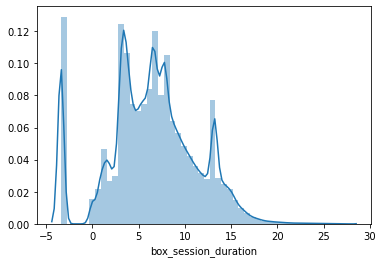

In [25]:

df_tr['session_duration'] =df_tr['session_duration'].fillna(0.01)
df_tr['session_duration'] = np.where(df_tr['session_duration']==0.0,0.01, df_tr['session_duration'])

df_te['session_duration'] =df_te['session_duration'].fillna(0.01)
df_te['session_duration'] = np.where(df_te['session_duration']==0.0,0.01, df_te['session_duration'])

fitted_data, fitted_lambda = stats.boxcox(df_tr['session_duration']) 
df_tr['box_session_duration'] = fitted_data

sns.distplot(df_tr['box_session_duration'])


<ipython-input-26-6dc55b741304>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['hits'] = np.where(df_tr['hits']==0.0,0.01, df_tr['hits'])
<ipython-input-26-6dc55b741304>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['hits'] =df_tr['hits'].astype(float)


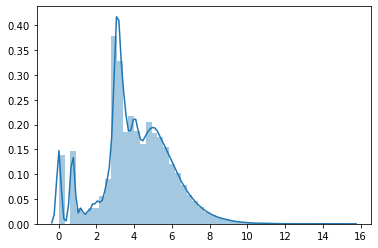

In [26]:

df_tr['hits'] = np.where(df_tr['hits']==0.0,0.01, df_tr['hits'])
df_tr['hits'] =df_tr['hits'].astype(float)
fitted_data, fitted_lambda = stats.boxcox(df_tr['hits']) 
sns.distplot(fitted_data)

<ipython-input-27-9a051a5614af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['log_hits'] = np.log(df_tr['hits'])


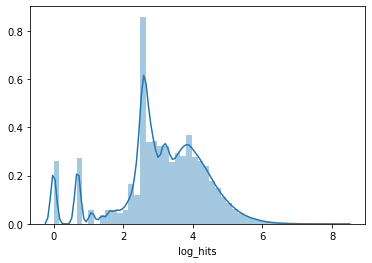

In [27]:
df_tr['log_hits'] = np.log(df_tr['hits'])
sns.distplot(df_tr['log_hits'])

In [28]:
df['locale'].value_counts(normalize = True)

L3    0.404792
L6    0.167388
L2    0.148924
L5    0.131913
L4    0.104129
L1    0.042853
Name: locale, dtype: float64

In [29]:
df_tr['path_length'] = df_tr['path_id_set'].apply(lambda x: str(x).split(';'))
df_tr['path_length2'] =df_tr['path_length'].apply(lambda x:len(x))
df_te['path_length'] = df_te['path_id_set'].apply(lambda x: str(x).split(';'))
df_te['path_length2'] =df_te['path_length'].apply(lambda x:len(x))

<ipython-input-29-ae1cc8d3fcfc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['path_length'] = df_tr['path_id_set'].apply(lambda x: str(x).split(';'))
<ipython-input-29-ae1cc8d3fcfc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['path_length2'] =df_tr['path_length'].apply(lambda x:len(x))
<ipython-input-29-ae1cc8d3fcfc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

# Start Modeling

In [30]:
def inv_boxcox(y,ld):
   if ld == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(ld*y+1)/ld))

In [31]:

fitted_hits, fitted_lambda_hits = stats.boxcox(df_tr['hits']) 


fitted_sess, fitted_lambda_sess = stats.boxcox(df_tr['session_duration']) 


fitted_sess_te, fitted_lambda_sess_te = stats.boxcox(df_te['session_duration']) 


df_tr['log_hits'] = np.log(df_tr['hits'])
df_tr['box_sess'] = fitted_sess
df_tr['day_num'] = df_tr['day_of_week'].apply(lambda x:week_to_num(x))


df_te['box_sess'] = fitted_sess_te
df_te['day_num'] = df_te['day_of_week'].apply(lambda x:week_to_num(x))
df_te['log_hits'] = df_te['hits']


<ipython-input-31-ffd69fc77a1d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['log_hits'] = np.log(df_tr['hits'])
<ipython-input-31-ffd69fc77a1d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['box_sess'] = fitted_sess
<ipython-input-31-ffd69fc77a1d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

# Bivariate Analysis

<ipython-input-32-3ee6e200b551>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['hits'] = df_tr['hits'].astype(float)


Text(0, 0.5, 'Avg. hits')

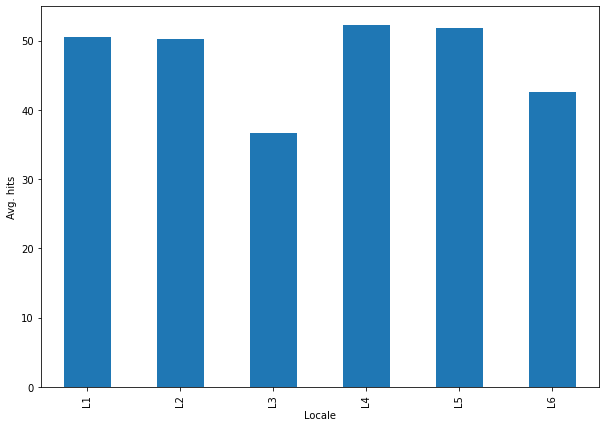

In [32]:

df_tr['hits'] = df_tr['hits'].astype(float)
df_tr_locale = df_tr[['locale','hits']].groupby(['locale']).agg({'hits':'mean'})
df_tr_locale['hits'].plot(kind = 'bar', figsize = (10,7))
plt.xlabel("Locale")
plt.ylabel("Avg. hits")


<ipython-input-33-d38fd7cbdf9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['agent_id2'] = df_tr['agent_id2'].astype(float)


Text(0, 0.5, 'Avg. hits')

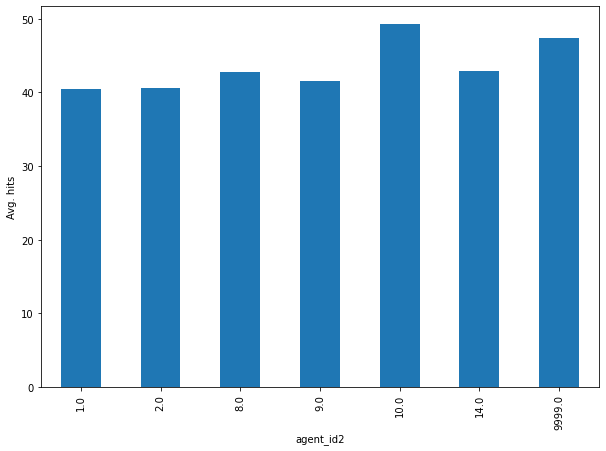

In [33]:
df_tr['agent_id2'] = df_tr['agent_id2'].astype(float)
df_tr_agent = df_tr[['agent_id2','hits']].groupby(['agent_id2']).agg({'hits':'mean'})
df_tr_agent['hits'].plot(kind = 'bar', figsize = (10,7))
plt.xlabel("agent_id2")
plt.ylabel("Avg. hits")


Text(0.5, 0, 'Frequency')

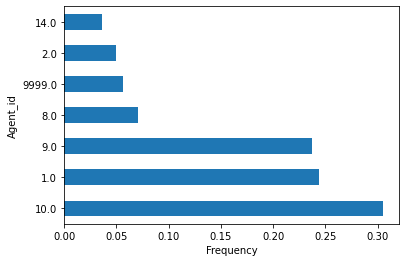

In [34]:
df_tr['agent_id2'].value_counts(normalize = True).plot(kind = 'barh')
plt.ylabel("Agent_id")
plt.xlabel("Frequency")

In [35]:
df_tr['agent_id'].value_counts()

10    184407
1     147575
9     143456
8      42740
2      29876
14     22032
7      17076
13     13275
0       1590
11      1499
12       276
15        56
3         40
5         26
4         23
Name: agent_id, dtype: int64

Text(0.5, 0, 'Frequency')

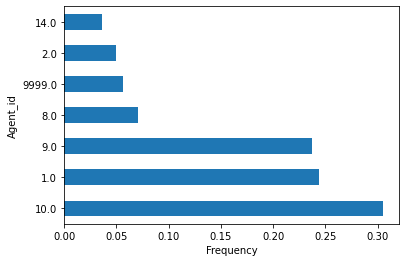

In [36]:
df_tr['agent_id2'].value_counts(normalize = True).plot(kind = 'barh')
plt.ylabel("Agent_id")
plt.xlabel("Frequency")

Text(0.5, 0, 'Frequency')

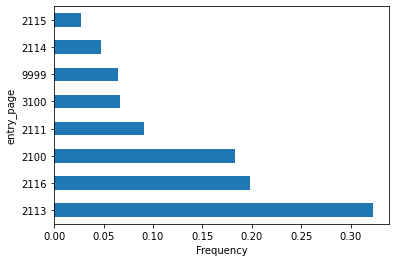

In [37]:
df_tr['entry_page2'].value_counts(normalize = True).plot(kind = 'barh')
plt.ylabel("entry_page")
plt.xlabel("Frequency")

In [38]:
df['agent_id'].unique()

array([ 1,  9,  8,  2, 13, 10,  6, 14, 11,  0,  7, 12,  4,  3, 15,  5],
      dtype=int64)

<ipython-input-39-2c90cb8896b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['entry_page2'] = df_tr['entry_page2'].astype(float)


Text(0, 0.5, 'avg. hits')

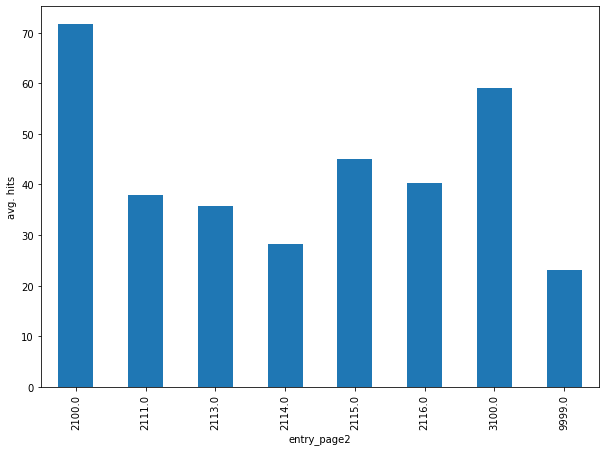

In [39]:
df_tr['entry_page2'] = df_tr['entry_page2'].astype(float)
df_tr_entry = df_tr[['entry_page2','hits']].groupby(['entry_page2']).agg({'hits':'mean'})
df_tr_entry['hits'].plot(kind = 'bar', figsize = (10,7))
plt.xlabel("entry_page2")
plt.ylabel("avg. hits")


<ipython-input-40-37d5e12f9e94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['traffic_type'] = df_tr['traffic_type'].astype(float)


Text(0, 0.5, 'avg. hits')

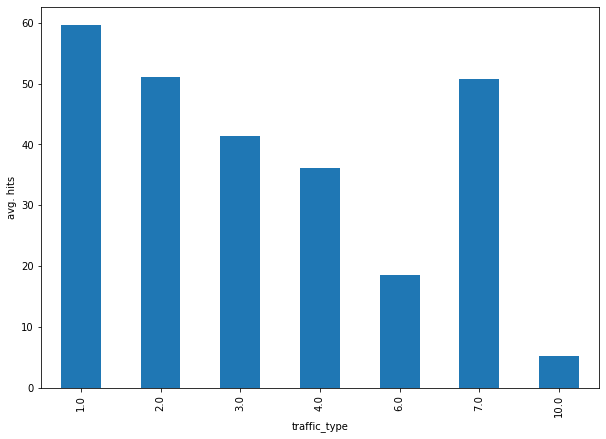

In [40]:
df_tr['traffic_type'] = df_tr['traffic_type'].astype(float)
df_tr_locale = df_tr[['traffic_type','hits']].groupby(['traffic_type']).agg({'hits':'mean'})
df_tr_locale['hits'].plot(kind = 'bar', figsize = (10,7))
plt.xlabel("traffic_type")
plt.ylabel("avg. hits")


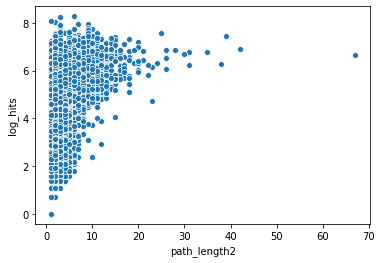

In [41]:
sns.scatterplot(df_tr['path_length2'], df_tr['log_hits'])

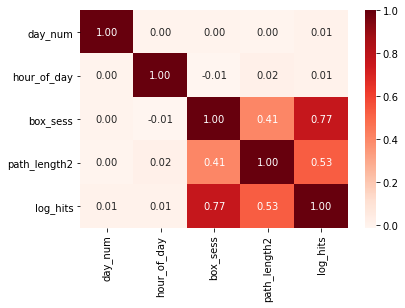

In [42]:
cols_numeric = [
     'locale',
     'day_num',
     'hour_of_day',
     'box_sess',
    'path_length2',
    'log_hits',

]
df_tr[cols_numeric].corr()
sns.heatmap(data=df_tr[cols_numeric].corr(), annot=True, fmt='.2f',cmap = 'Reds')


In [43]:
cols = ['row_num',
     'locale',
     'day_num',
     'hour_of_day',
     'agent_id2',
     'entry_page2',
#     'path_id_set',
     'traffic_type',
     'box_sess',
    'log_hits',
   #     'box_hits',
        'hits',
        'path_length2',
     'entry_page2']




df_tr2 = df_tr[cols]
df_te2 = df_te[cols]

# **Model Train and Validation**

In [44]:
df_tr2 = pd.get_dummies(df_tr2, columns = ['locale','agent_id2','entry_page2','traffic_type'])

df_te2 = pd.get_dummies(df_te2, columns = ['locale','agent_id2','entry_page2','traffic_type'])




df_y = df_tr2[['hits','log_hits','row_num']]
df_x = df_tr2.drop(['hits','log_hits'],axis = 1)



test_y = df_te2[['hits','log_hits','row_num']]
test_x = df_te2.drop(['hits','log_hits'],axis = 1)


df_x.set_index('row_num',inplace = True)
df_y.set_index('row_num',inplace = True)
test_x.set_index('row_num',inplace = True)
test_y.set_index('row_num',inplace = True)



df_train2_x, df_val2_x, df_train2_y, df_val2_y = train_test_split(df_x, df_y,
                                                                        test_size=0.2, random_state=42,shuffle =True)

#fitted_hits, fitted_lambda_hits = stats.boxcox(df_train2_y['hits']) 
#df_train2_y['box_hits'] = fitted_lambda_hits

In [45]:
rf = RandomForestRegressor(random_state=42,oob_score = True)

rf.fit(df_train2_x,df_train2_y['log_hits'])

RandomForestRegressor(oob_score=True, random_state=42)

In [46]:

log_hits_pred = rf.predict(df_val2_x)
hits_pred = np.exp(log_hits_pred)
#hits_pred = inv_boxcox(box_hits_pred,fitted_lambda_hits)
rmse(df_val2_y['hits'],hits_pred)

47.93202275897184

# Train RF model with randomized search

In [47]:

score_rmse = make_scorer(rmse, greater_is_better=False)
param_grid =    {   
    'n_estimators': range(30,120),
    'max_features': ['sqrt'],
    'max_depth' : range(1,10),
    'min_samples_leaf':range(1,5),
    'min_samples_split':range(2,7)
  #  'criterion' :['entropy']
    }

CV_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv= 5,n_jobs = 4,
                                n_iter = 10,verbose = 3,scoring = score_rmse,return_train_score = True)

In [48]:
CV_rf.fit(df_train2_x,df_train2_y['log_hits'])
be = CV_rf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  6.3min finished


In [49]:
feature_importances(be,df_train2_x)

,colnames,Feature_Imp
2,box_sess,0.462341
3,path_length2,0.280110
37,traffic_type_6.0,0.050284
32,entry_page2_9999.0,0.030058
24,entry_page2_9999.0,0.023805
23,entry_page2_3100.0,0.021777
25,entry_page2_2100.0,0.020724
17,entry_page2_2100.0,0.020504
34,traffic_type_2.0,0.018817
31,entry_page2_3100.0,0.015946


In [50]:
log_hits_pred = be.predict(df_val2_x)
hits_pred = np.exp(log_hits_pred)
print(rmse(df_val2_y['hits'],hits_pred))
res = pd.DataFrame()
res['hits'] = df_val2_y['hits']
res['hits_pred'] = hits_pred


55.59379399314428


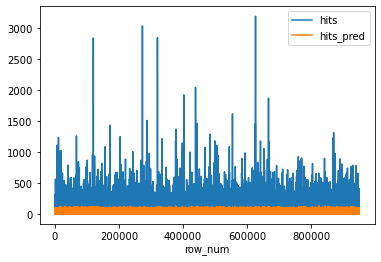

In [51]:
res = res.sort_index(axis=0)
res.plot()

# Train Randomized Search RF model on Entire Training Data

In [52]:
CV_rf2 = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv= 5,n_jobs = 4,
                                n_iter = 10,verbose = 3,scoring = score_rmse,return_train_score = True)
CV_rf2.fit(df_x,df_y['log_hits'])

be2 = CV_rf2.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  8.4min finished
